In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Example Data
* An experimental drug was tested on individuals from ages 10 to 100.
* The trail had 2000 participates.
* Half were under 50, half older.
* 80% of younger half have negetive results.
* 80% of older hald have positive results.

In [2]:
younger = np.random.randint(10, 51, size=1000).reshape(-1, 1)
older = np.random.randint(51, 100, size=1000).reshape(-1, 1)
train_samples = np.concatenate((younger, older), axis = 0)

In [3]:
younger = np.random.choice(2, size=1000, p=[0.8,0.2]).reshape(-1, 1)
older = np.random.choice(2, size=1000, p=[0.2,0.8]).reshape(-1, 1)
train_labels = np.concatenate((younger, older), axis=0)

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples)

/home/shared/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
shuffle = np.arange(2000)
np.random.shuffle(shuffle)
scaled_train_samples = scaled_train_samples[shuffle]
train_labels = train_labels[shuffle]

## Three-layer NN with Adam optimizer

In [6]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [7]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=1)

Train on 1800 samples, validate on 200 samples
Epoch 1/20
1800/1800 [==============================] - 2s 1ms/step - loss: 0.7037 - acc: 0.5033 - val_loss: 0.6956 - val_acc: 0.4650
Epoch 2/20
1800/1800 [==============================] - 0s 167us/step - loss: 0.6883 - acc: 0.6233 - val_loss: 0.6816 - val_acc: 0.6050
Epoch 3/20
1800/1800 [==============================] - 0s 168us/step - loss: 0.6738 - acc: 0.6372 - val_loss: 0.6687 - val_acc: 0.6150
Epoch 4/20
1800/1800 [==============================] - 0s 170us/step - loss: 0.6605 - acc: 0.6850 - val_loss: 0.6568 - val_acc: 0.6250
Epoch 5/20
1800/1800 [==============================] - 0s 171us/step - loss: 0.6480 - acc: 0.6839 - val_loss: 0.6472 - val_acc: 0.6400
Epoch 6/20
1800/1800 [==============================] - 0s 172us/step - loss: 0.6366 - acc: 0.7072 - val_loss: 0.6386 - val_acc: 0.6850
Epoch 7/20
1800/1800 [==============================] - 0s 166us/step - loss: 0.6253 - acc: 0.7339 - val_loss: 0.6299 - val_acc: 0.7150
Epo

In [30]:
younger = np.random.randint(10, 51, size=100).reshape(-1, 1)
older = np.random.randint(51, 100, size=100).reshape(-1, 1)
test_samples = np.concatenate((younger, older), axis = 0)
younger = np.random.choice(2, size=100, p=[0.8,0.2]).reshape(-1, 1)
older = np.random.choice(2, size=100, p=[0.2,0.8]).reshape(-1, 1)
test_labels = np.concatenate((younger, older), axis=0)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples)
shuffle = np.arange(200)
np.random.shuffle(shuffle)
scaled_test_samples = scaled_test_samples[shuffle]
test_labels = test_labels[shuffle]

/home/shared/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
model.predict(scaled_test_samples, batch_size=10, verbose=0)

array([[0.18870538, 0.8112946 ],
       [0.15671636, 0.84328365],
       [0.2353095 , 0.76469046],
       [0.18870538, 0.8112946 ],
       [0.77683985, 0.22316015],
       [0.6627503 , 0.33724973],
       [0.16004008, 0.83996   ],
       [0.61976993, 0.38023016],
       [0.17751841, 0.8224816 ],
       [0.22814655, 0.77185345],
       [0.39020652, 0.6097935 ],
       [0.412669  , 0.587331  ],
       [0.56336194, 0.4366381 ],
       [0.2045382 , 0.79546183],
       [0.6627503 , 0.33724973],
       [0.67311895, 0.3268811 ],
       [0.26799503, 0.732005  ],
       [0.69334984, 0.3066502 ],
       [0.5169471 , 0.48305294],
       [0.1925526 , 0.8074474 ],
       [0.2219027 , 0.77809733],
       [0.76667297, 0.23332709],
       [0.69334984, 0.3066502 ],
       [0.5975026 , 0.40249744],
       [0.7223361 , 0.27766383],
       [0.42404452, 0.57595545],
       [0.52861   , 0.47138998],
       [0.5402417 , 0.45975822],
       [0.1739069 , 0.82609314],
       [0.36820018, 0.6317998 ],
       [0.

In [32]:
prediction = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

# Confusion Matrix

In [33]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [34]:
cm = confusion_matrix(test_labels, prediction)

In [35]:
def plot_confusion_matrix(cm, classes,
                         normalization=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    This is function prints and plots the confusion matrix.
    Normalization can be applied by setting 'True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalization:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalization confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="red" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[84 26]
 [18 72]]


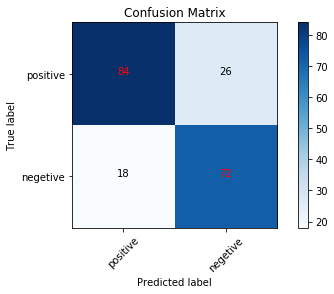

In [36]:
cm_plot_labels = ['positive', 'negetive']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

# Save and Load Model
## 1. model.save()

In [18]:
model.save('first_model.h5')

This function saves:
* The architecture of the model, allowing to recreate the model
* The weights of the model
* The training configuration(loss, optimizer)
* The state of thte optimizer, allowing to resume training exactly where you left off

In [19]:
from keras.models import load_model
new_model = load_model('first_model.h5')

In [20]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [21]:
new_model.get_weights()

[array([[ 0.47651103, -0.17376271, -0.33923426, -0.2947242 ,  0.41391018,
         -0.5605991 , -0.46536398,  0.71695   ,  0.32736814, -0.00592934,
         -0.49973375, -0.03224009,  0.6212056 ,  0.2073852 ,  0.15997186,
         -0.09088755]], dtype=float32),
 array([-0.08661903,  0.        ,  0.        ,  0.        , -0.08015214,
         0.        ,  0.        ,  0.09176162, -0.06118227,  0.12131497,
         0.        ,  0.        , -0.06317133, -0.03834474, -0.02281619,
         0.        ], dtype=float32),
 array([[-0.03096911, -0.31696308, -0.04708217, -0.1904664 ,  0.38220254,
         -0.1713376 ,  0.07629566, -0.34834242,  0.01621759,  0.17669581,
         -0.27421743, -0.05063207, -0.43917105,  0.08256012, -0.31861347,
         -0.2663218 , -0.29729748, -0.30591297,  0.26595768, -0.11703858,
         -0.26540518,  0.28171176,  0.01401495,  0.14627863, -0.21207206,
         -0.01018673,  0.486882  , -0.11921033,  0.06834646, -0.24159761,
         -0.09411615, -0.32649088],
 

In [22]:
new_model.optimizer

## 2. model.to_json()
If you only need to save the architecture of a model, and not its weights of its training configuration, you cna use the following function to save the architecture only

In [23]:
#save as json
json_string = model.to_json()

#save as YAML
#yaml_string = model._to_yaml()

In [24]:
json_string

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "b

In [25]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [26]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_architecture.get_weights()

[array([[-0.09147066,  0.4825759 , -0.40045184, -0.18272778,  0.15849924,
          0.33471602,  0.03200525, -0.591152  ,  0.10870922,  0.49889052,
         -0.56499845,  0.15621752,  0.02770132,  0.0323205 , -0.4241336 ,
          0.48310125]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 6.38964772e-02, -2.00212002e-04,  2.65782386e-01,
          1.81316048e-01,  1.86899155e-01, -1.87695429e-01,
         -3.35858613e-01,  8.70880187e-02,  3.22444469e-01,
         -1.92692772e-01, -2.32970238e-01,  3.24725360e-01,
          3.09752256e-01,  1.32241815e-01,  3.15681010e-01,
          2.26158887e-01, -3.49143744e-01, -2.02133328e-01,
          1.07892811e-01, -2.09387481e-01,  1.07752293e-01,
         -2.81223595e-01,  1.47624284e-01, -2.62450367e-01,
          2.85611898e-01, -1.75482959e-01, -8.68919790e-02,
          1.19855613e-01,  1.79767281e-01,  1.07814431e-01,
         -1.73050240e-01,  3.47981244e-01]

In [28]:
model_architecture.optimizer

AttributeError: 'Sequential' object has no attribute 'optimizer'

## 3. model.save_weights()
If you only need to save the weights of the model, yoiu can use the following save the weights only

In [ ]:
model.save_weights('first_model.h5')

In [ ]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model2.load_weights('first_model.h5')

In [ ]:
model2.get_weights()